In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [4]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [8]:
fish_target = df.loc[cond, ['Species']]
#fish_target

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [13]:
len(train_target)

36

In [14]:
len(test_target)

13

In [16]:
test_target

,Species
6,Bream
19,Bream
8,Bream
156,Smelt
14,Bream
146,Smelt
149,Smelt
20,Bream
10,Bream
13,Bream


In [18]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [19]:
kn.score(test_input, test_target['Species'])

1.0

In [21]:
kn.predict([[25, 150]])

C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

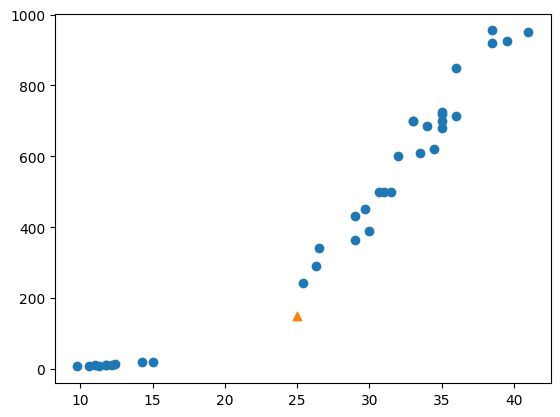

In [41]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')

In [39]:
kn.kneighbors([[25, 150]]) #가까운거 알려줌 array([[26, 16, 12,  1, 31]]))

C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.39320793]]),
 array([[26, 16, 12,  1, 31]]))

In [44]:
#표준점수
mean = train_input.mean() #평균
std = train_input.std()
print(mean)
print(std)

Length2     27.188889
Weight     449.338889
dtype: float64
Length2     10.173292
Weight     326.168556
dtype: float64


In [48]:
train_scaled = (train_input - mean) / std

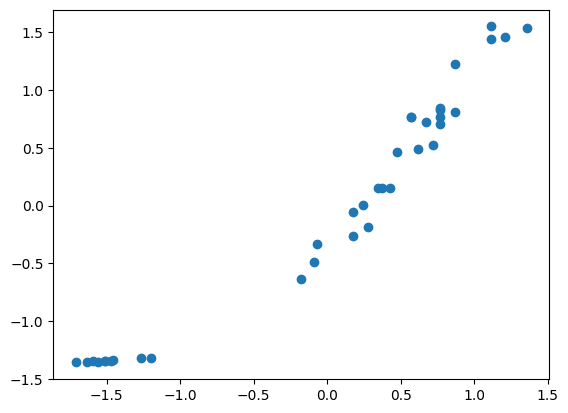

In [50]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight']) #각각 간격이 동일하게 바뀜

In [51]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [52]:
test_scaled = (test_input - mean) / std

In [53]:
kn.score(test_scaled, test_target)

1.0

In [55]:
new = ([25, 150] - mean) / std
new

Length2   -0.215160
Weight    -0.917743
dtype: float64

In [56]:
kn.predict([new])

C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)